<a href="https://colab.research.google.com/github/RedZeptic/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/Thomas_Mineo_LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [6]:
# to check pandas version
pd.__version__

'0.24.2'

In [7]:
# to install not bugged version
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 4.8MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

In [0]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/RedZeptic/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')
print(df.shape)
df.head()

(1200, 4)


,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [116]:
# putting all subject ages into groups, for better displayment of the crosstable

age_bins = pd.cut(df['age'], 6) # 6 equal bins
exer_bins = pd.cut(df['exercise_time'], 6)
wgt_bins = pd.cut(df['weight'], 6)
# crosstab = pd.crosstab([wgt_bins, exer_bins], age_bins)  <--- what I tried first
crosstab = pd.crosstab(exer_bins, wgt_bins)
crosstab

weight,"(99.854, 124.333]","(124.333, 148.667]","(148.667, 173.0]","(173.0, 197.333]","(197.333, 221.667]","(221.667, 246.0]"
exercise_time,,,,,,
"(-0.3, 50.0]",34,37,37,47,52,34
"(50.0, 100.0]",42,47,63,45,62,5
"(100.0, 150.0]",51,27,49,41,26,0
"(150.0, 200.0]",51,62,44,31,2,0
"(200.0, 250.0]",46,63,42,4,0,0
"(250.0, 300.0]",70,68,18,0,0,0


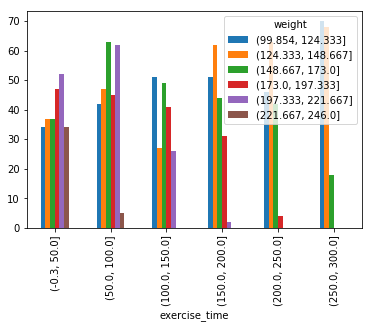

In [117]:
crosstab.plot(kind='bar') # Negative Linear Relationship between Exercise_time and Weight

In [0]:
import matplotlib.pyplot as plt

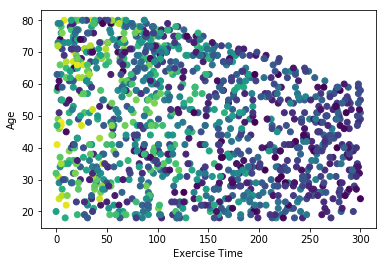

In [125]:
x = df['exercise_time']
y = df['age']
plt.xlabel('Exercise Time')
plt.ylabel('Age')
plt.scatter(x,y,c=df['weight'])
# this graph is showing even disribution(for simplicity of explaining)

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  **What are the variable types in the data?**
  - Age(Independant), Weight(Dependant(what we are trying to predict)), Exercise Time(Independant)
2.  **What are the relationships between the variables?**
  - As Exercise Time goes up -> Weight goes down. As you get older, you will most likely weigh more. 
3.  **Which relationships are "real", and which spurious?**
  - The real relationship is between Exercise Time Going up or down, and the Gain or Loss of weight(As it has a Negative Linear Relationship). Also there is some truth to getting older and weighing more, but currently with this dataset I would say it's spurious(As it mostly shows us an Even Distribution Relationship).

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)